# Digits recognition
> Identifying hand written digits

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.


## Dataset exploration
First, let's load and explore the training dataset

In [57]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('./digits/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./digits/three_1.png
./digits/train.csv
./digits/six_1.png
./digits/nine_1.png


In [58]:
TRAIN_CSV = './digits/train.csv'
df = pd.read_csv(TRAIN_CSV)
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Our dataset has 42000 rows and 785 columns.

The first column <b>label</b> is the digit, while the rest 784 columns <b>pixel<i>i</i></b> represents the value of the i_th pixel

In [59]:
import seaborn as sn
sn.set()

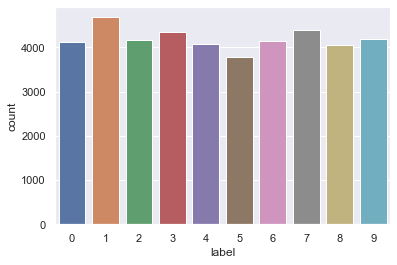

In [60]:
sn.countplot(x='label', data=df)

We have around 4000 examples of every digit. Lets split our dataset in two parts for training and testing 

In [61]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [62]:
train_labels

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

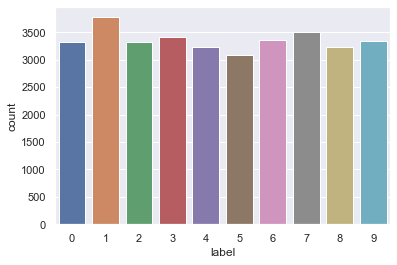

In [63]:
sn.countplot(x='label', data=pd.DataFrame(train_labels))

## Model training
Now that we split our dataset between train and test, lets chose a classification model

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_features, train_labels)

DecisionTreeClassifier()

In [65]:
tree.predict(df.drop(columns=['label']).head())

array([1, 0, 1, 4, 0])

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=10)

In [67]:
forest.predict(df.drop(columns=['label']).head())

array([1, 0, 1, 4, 0])

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(60, 30, 10), random_state=1)
nn.fit(train_features, train_labels)

In [ ]:
nn.predict(df.drop(columns=['label']).head())

## Model evaluation
Let's evaluate our models using accuracy ad recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
eval_df = pd.DataFrame(columns=['model', 'accuracy', 'recall'])
for name, model in {'decision tree': tree, 'random forest': forest, 'neural network': nn}.items():
    eval_df = eval_df.append({'model':name, 'accuracy': accuracy_score(test_labels, model.predict(test_features)), 'recall':recall_score(test_labels, model.predict(test_features), average='micro')}, ignore_index=True)

In [ ]:
eval_df

In [ ]:
eval_df.plot(x='model', y='accuracy', kind='bar')
eval_df.plot(x='model', y='recall', kind='bar')

As we can see, the neural network has a slightly better accuracy and recall than the decision trees and random forest. So, we will use our neural network model in order to classify.